In [27]:
from layout import Layout

## Definition
The (logical) product is defined as $A \otimes B := (A, \tilde A \circ B)$.

In terms of the pseudo code:
```python
size = self.size() * other.cosize()
compl = self.complement(size)
compo = compl.composite(other)
return Layout.from_concate(self, compo)
```

It is best to illustrate the idea of a logical product using a 2D by-mode example as follows.

## 2D By-Mode Product

For 2D layout $A = (A_{s_1}, A_{s_2}):(A_{d_1}, A_{d_2})$ and $B = (B_{s_1}, B_{s_2}):(B_{d_1}, B_{d_2})$,
the product $A \otimes B$ will generate $B_{s_1} \times B_{s_2}$ tiles where the first tile is $A$.
And the resulting stride along the m-axis is $(A_{s_1} \times B_{d_1})$, and $(A_{s_2} \times B_{d_2})$ along the n-axis.

((2, 3), (5, 4)):((5, 40), (1, 50))

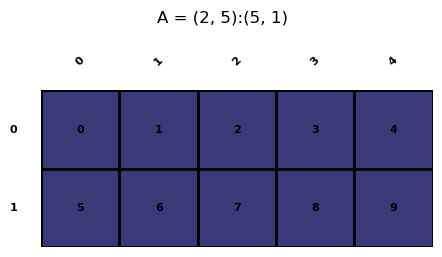

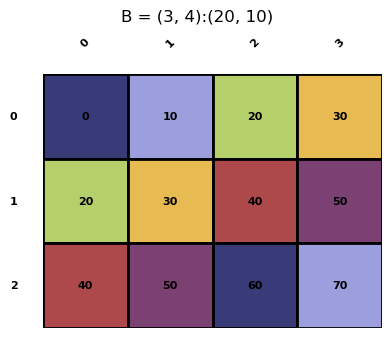

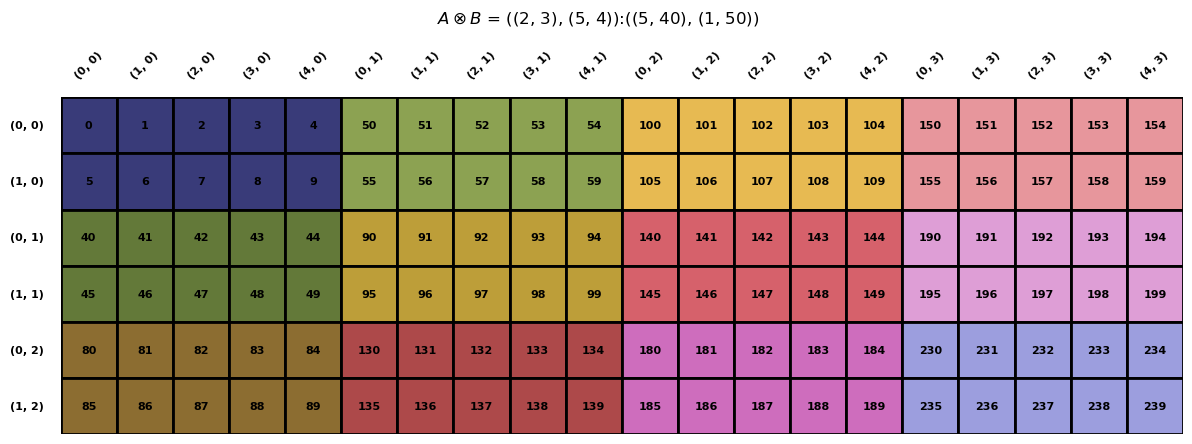

In [15]:
A = Layout.from_string('(2,5):(5,1)').visualize('A', color_cycle=10)
B = Layout.from_string('(3,4):(20,10)').visualize('B', color_cycle=3)
A.logical_product(B, by_mode=True).visualize('$A \\otimes B$', color_cycle=10)

To understand how the product operation achieves the desired effect, let us break it down into steps and mode-by-mode.

For the 1st mode, we expect the result $C_1$ to contain $A_1$ as its first "tile". Specifically,
* $\operatorname{size}(C_1) = \operatorname{size}(A_1) \times \operatorname{size}(B_1) = 2 \times 3 = 6$
* $\operatorname{stride-across-tiles}(C_1) = \operatorname{size}(A_1) \times \operatorname{stride}(B_1) = 2 \times 20 = 40$

To avoid the "pointer" $B_1$ out-of-bound, we allocate $\tilde{A_1} =\operatorname{complement}(A_1, x)$ with a cortarget $x$ large enough to cover $\operatorname{cosize}(B_1)=41$.

According to the complement formula, the resulting $\operatorname{size}(\tilde{A_1}) = (d_1 / 1) \cdot (d_2 / (s_1 d_1)) ... (x/ (s_{k-1} d_{k-1})) \ge x / \operatorname{size}(A_1)$.
Hence it is safe to set $\operatorname{size}(\tilde{A_1}) \ge x / \operatorname{size}(A_1) = \operatorname{cosize}(B_1) = 41$ which follows $x = \operatorname{size}(A_1) \times \operatorname{cosize}(B_1)$.

To meet the expected product layout, the intermediate steps
* uses $B_1$ as the pointer implies that $\tilde A_1 \circ B_1$ is the same size of $B_1$. The later concatenation operation leads to $C_1$ with multiplied sizes from $A_1$ and $B_1$;
* for "stride across tiles", $\operatorname{stride}(B_1) = 20$ will be mapped to the $n$-th column of $\tilde A_1$ with a n-axis stride of $s_1 \times d_1$ where $n= 20 / |\operatorname{height}(\tilde A_1)| = 20 / d_1$, hence the corresponding index is $(s_1 \times d_1) \times (20 / d_1) = s_1 \times 20$ which is exactly $\operatorname{size}(A_1) \times \operatorname{stride}(B_1)$.

size =  2 * 41 = 82
complement: + 5/1:1
complement: + 82/10:10
composite: + min(5/20, 3):1*20
composite: + 3:10*4



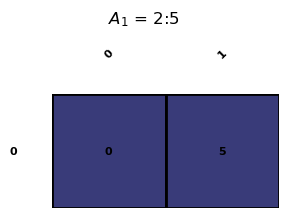

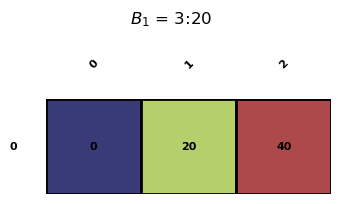

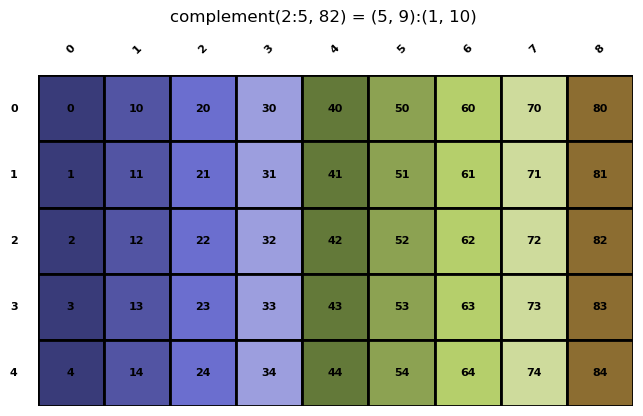

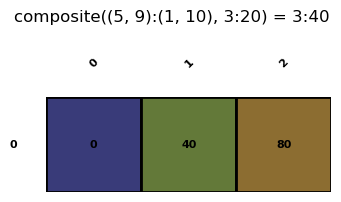

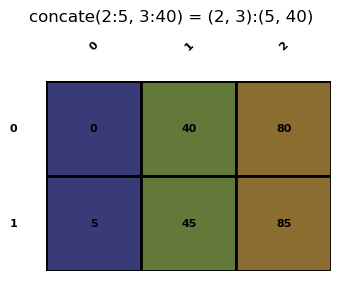

In [21]:
A1 = Layout.from_string('2:5').visualize('$A_1$', color_cycle=10)
B1 = Layout.from_string('3:20').visualize('$B_1$', color_cycle=3)
print('size = ', A1.size(), '*', B1.cosize(), '=', size:=A1.size() * B1.cosize())
_ = A1.logical_product(B1, visualize_steps=True, verbose=True, color_cycle=10)

Similarly, for the 2nd mode:

size =  5 * 31 = 155
complement: + 1/1:1
complement: + 155/5:5
composite: + 4:5*10



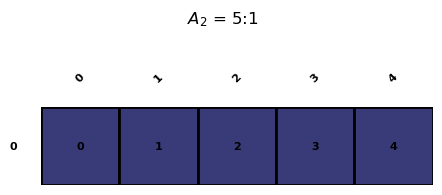

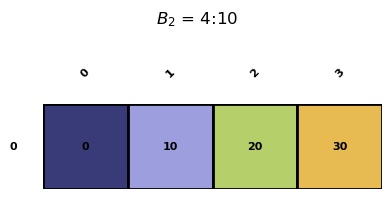

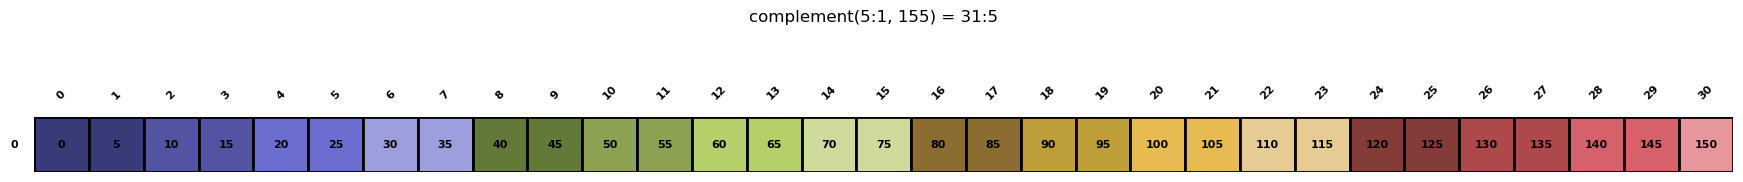

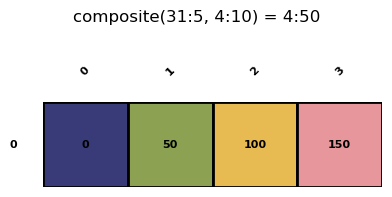

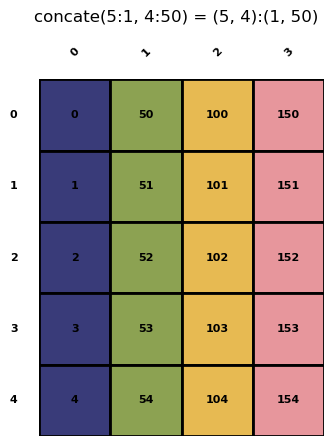

In [20]:
A2 = Layout.from_string('5:1').visualize('$A_2$', color_cycle=10)
B2 = Layout.from_string('4:10').visualize('$B_2$', color_cycle=3)
print('size = ', A2.size(), '*', B2.cosize(), '=', size:=A2.size() * B2.cosize())
_ = A2.logical_product(B2, visualize_steps=True, verbose=True, color_cycle=10)

## Blocked Product

((2, 3), (5, 4)):((5, 40), (1, 50))

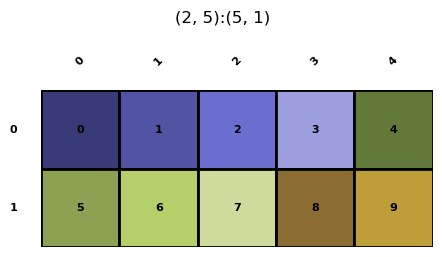

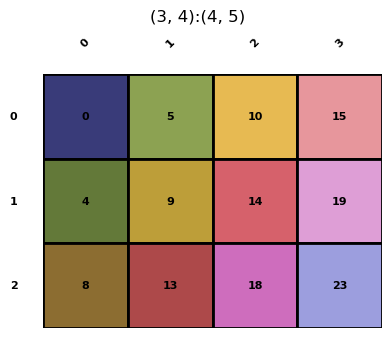

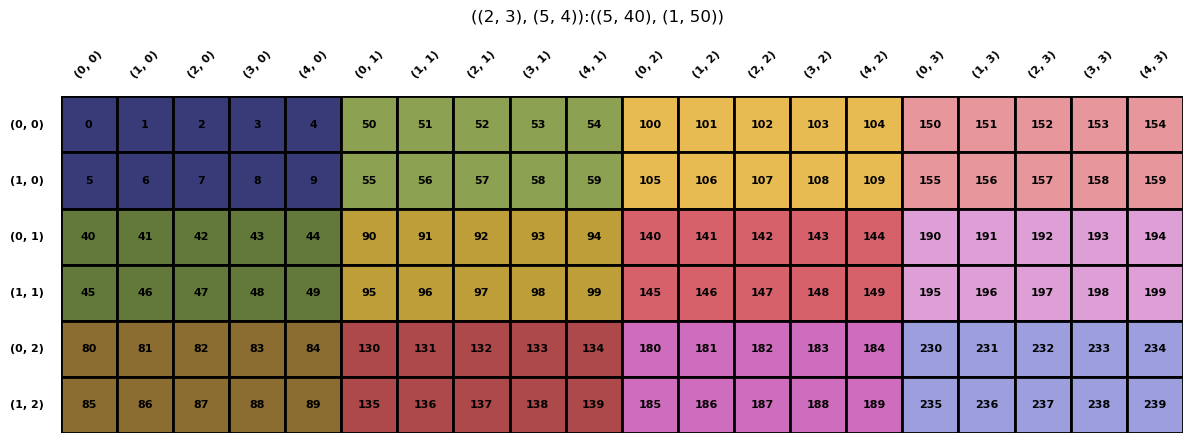

In [26]:
Layout.from_string('(2,5):(5,1)').visualize().blocked_product(Layout.from_string('(3, 4):(4, 5)').visualize()).visualize(color_cycle=10)